In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import solve_ivp
from ipywidgets import interactive
rcParams['figure.figsize'] = [20, 20]

In [2]:
def fun(t, vec):
    x = vec[0]
    y = vec[1]
    return np.array([-y+m*x+x*y**2, x+m*y-x**2])

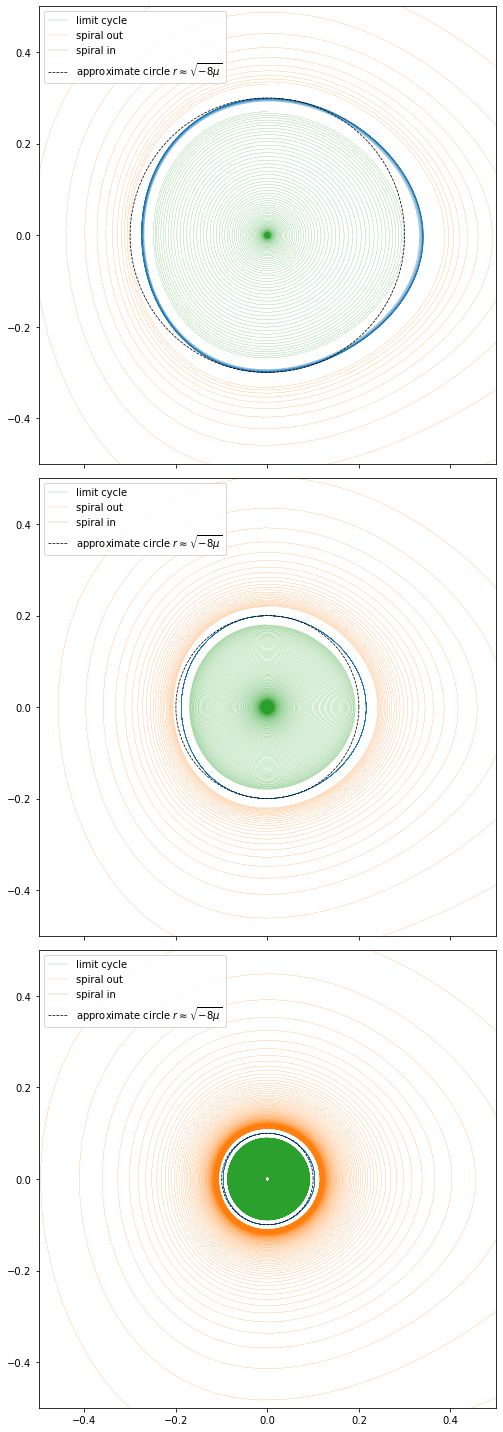

In [5]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True)
vec0 = np.array([1.1,1])
tspan = np.array([0,1000])
m_list = (-0.09/8,-0.04/8, -0.01/8)
theta = np.linspace(0,2*np.pi,100)
for i in range(3):
    ax[i].set_xlim(-0.5,0.5)
    ax[i].set_ylim(-0.5,0.5)
    ax[i].set_aspect('equal')
    m = m_list[i]
    r = np.sqrt(-8*m)
    vec0 = np.array([0,r])
    sol = solve_ivp(fun, 0.1*tspan, vec0, dense_output=True, method='Radau', max_step=0.1)
    ax[i].plot(sol.y[0], sol.y[1], linewidth=0.2, label='limit cycle')
    vec0 = np.array([0,r*1.1])
    sol = solve_ivp(fun, tspan, vec0, dense_output=True, method='Radau', max_step=0.1)
    ax[i].plot(sol.y[0], sol.y[1], linewidth=0.2, label='spiral out')
    vec0 = np.array([0,r*0.9])
    sol = solve_ivp(fun, tspan*3, vec0, dense_output=True, method='Radau', max_step=0.1)
    ax[i].plot(sol.y[0], sol.y[1], linewidth=0.2, label='spiral in')
    ax[i].plot(r*np.cos(theta), r*np.sin(theta),  color='black', linestyle='dashed', linewidth=0.75,label=r'approximate circle $r\approx\sqrt{-8\mu}$')
    ax[i].legend()
fig.tight_layout()

In [4]:
np.random.rand(2)*5

array([2.93353948, 4.4477457 ])